In [2]:
from BLOCH_beamline import *

dataFolder = Path('Data/')
%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 02.13.2018 

	Latest change: Simple resolution calculators



In [4]:
from lmfit import minimize, Parameters

###########################
def residual(params, x, y):
###########################
	return (y-Gauss(params,x))

########################
def Gauss(params,x):
########################    
    amplitude = params['amplitude'].value
    center = params['center'].value
    width = params['width'].value
    offset = params['offset'].value

    model = offset + (amplitude*np.exp(-(x-center)**2/(2.*width**2))) 

    return model

In [5]:
def fitGaussToSet(filename,firstScan,lastScan,showPlots=False):
    optimal_m1_pitch=[]
    
    for scanNumber in range(firstScan,lastScan+1,1):
        if showPlots: fig = plt.figure(figsize=(8,8))
            
        scan = HDF5loadscan(filename,scanNumber)    

        scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]

        maxCurrent = max(scan['diodeCurrent'])
        minCurrent= min(scan['diodeCurrent'])
        maxCurrentIndex = scan['diodeCurrent'].index(maxCurrent)
        peakMaximum =scan['m1_pitch'][maxCurrentIndex]

        mask = [(ii<(peakMaximum+8)) and (ii>(peakMaximum-8)) for ii in scan['m1_pitch']]        
        current = [element for index,element in enumerate(scan['diodeCurrent']) if mask[index]]
        pitch = [element for index,element in enumerate(scan['m1_pitch']) if mask[index]]
        
        
        params = Parameters()

        params.add('amplitude', 	value=maxCurrent, vary=True)
        params.add('width', 	value=10,vary=True)
        params.add('center', 	value=peakMaximum,vary=True)
        params.add('offset', 	value=minCurrent,vary=True)

        out = minimize(residual, params,args=(pitch, current),method='leastsq')

        fittedCurve=Gauss(out.params,pitch)
        if showPlots: print("position=",out.params['center'].value)
        
        optimal_m1_pitch.append(out.params['center'].value)
  
        if showPlots: 
            plt.plot(scan['m1_pitch'],scan['diodeCurrent'],label='Measurement')
            plt.plot(pitch,fittedCurve,label='Gaussian fit')
            plt.legend()
            plt.show()      
        
    return optimal_m1_pitch

position= -1824.6811511426522


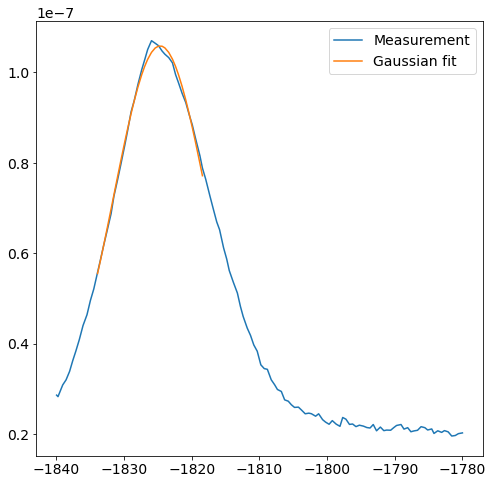

position= -1825.103197794679


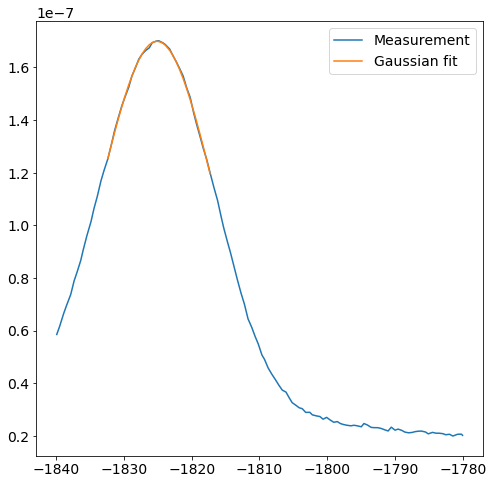

position= -1823.3895846588591


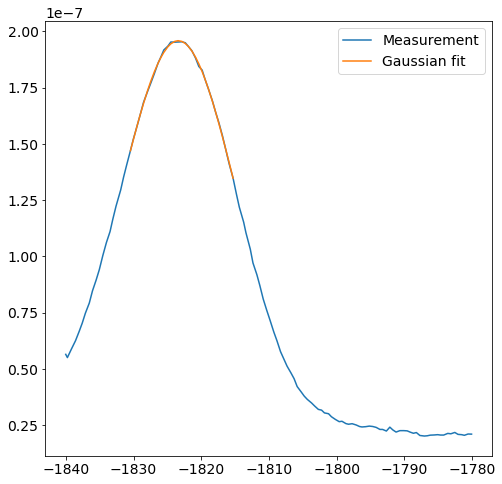

position= -1822.7305968624078


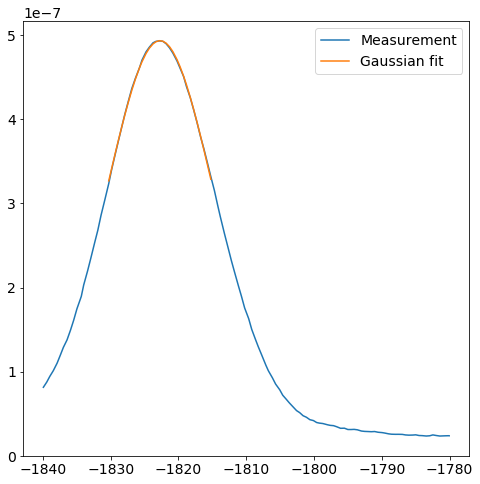

position= -1821.1802264625176


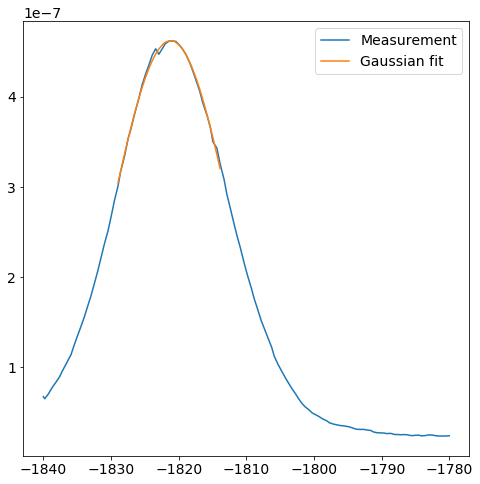

position= -1818.940567007085


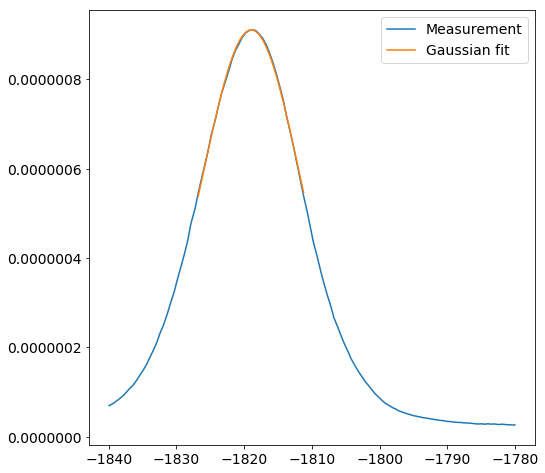

position= -1816.2455249154925


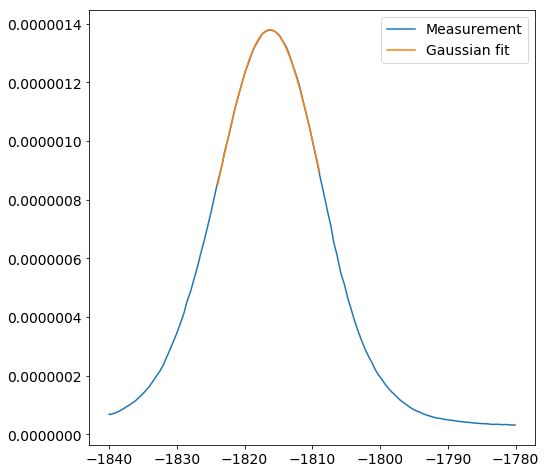

position= -1814.6979382739523


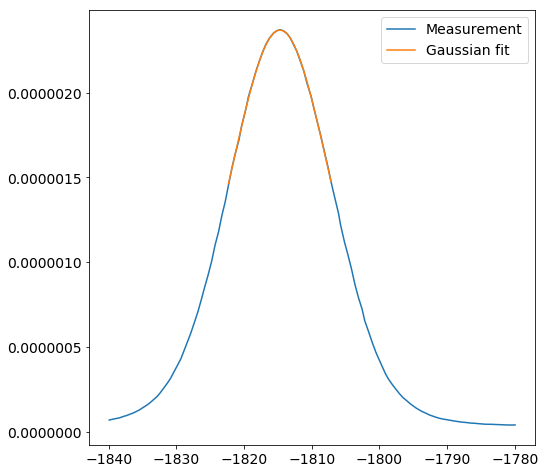

position= -1812.8908252923843


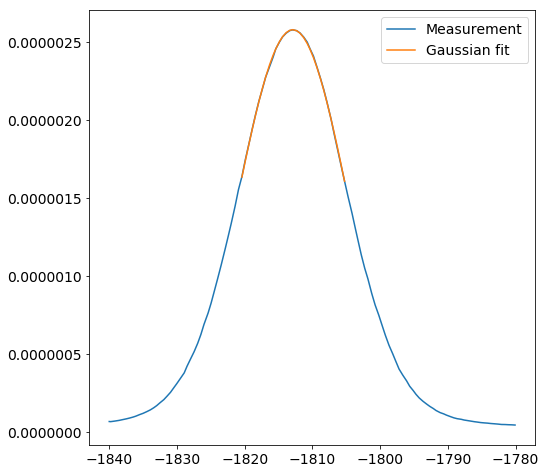

position= -1812.041347505902


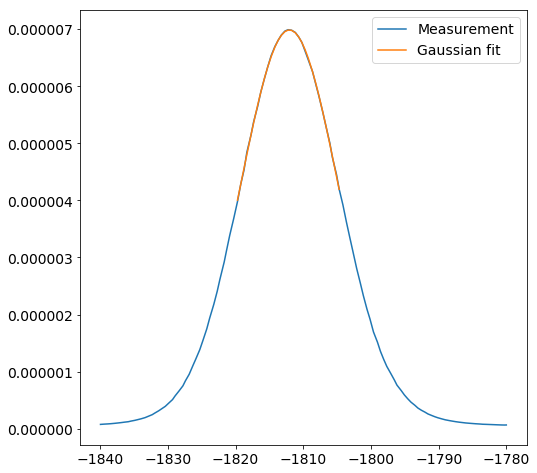

position= -1810.0349277722432


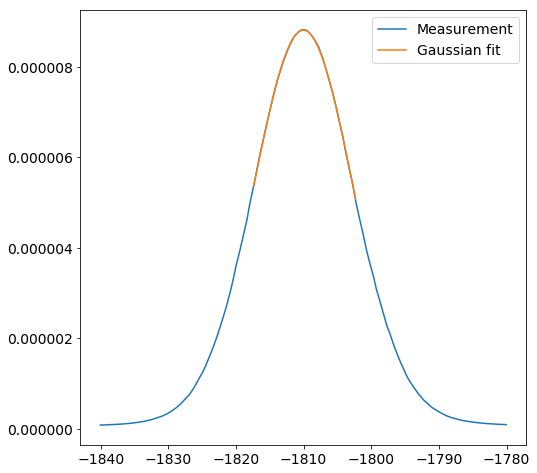

position= -1808.1450679337777


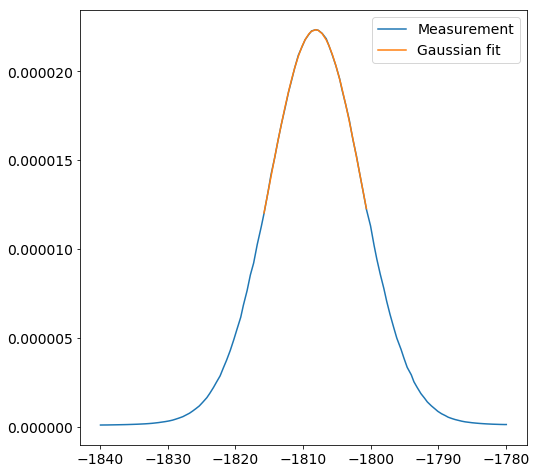

position= -1806.2337568331811


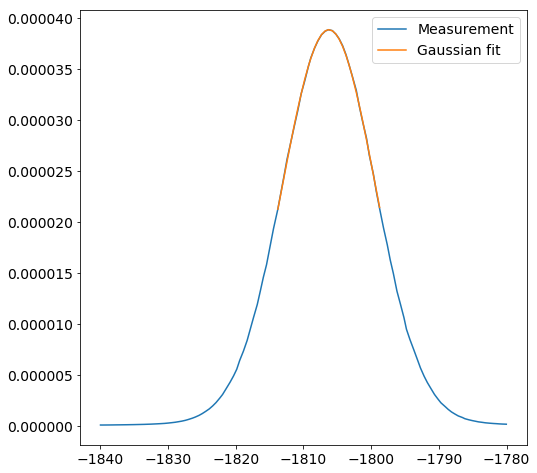

position= -1805.5194623143395


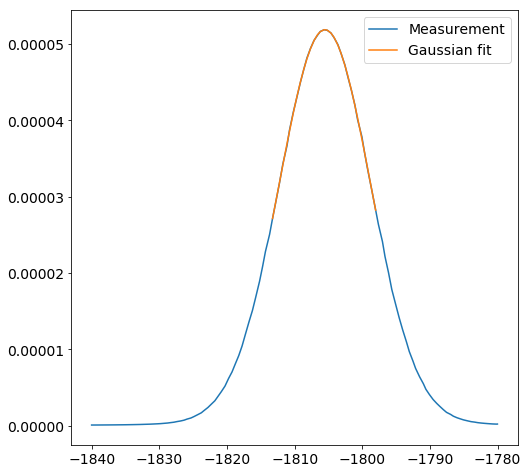

position= -1803.6415646439887


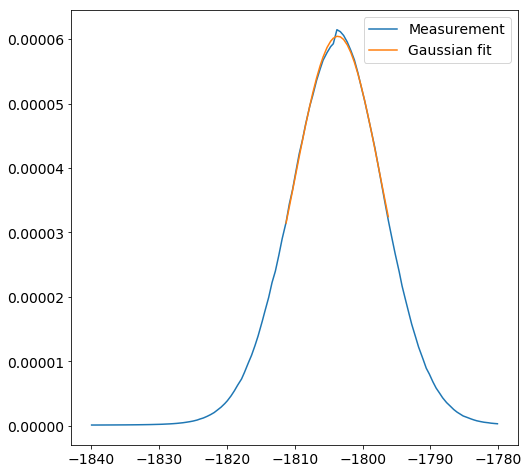

position= -1803.3499516259294


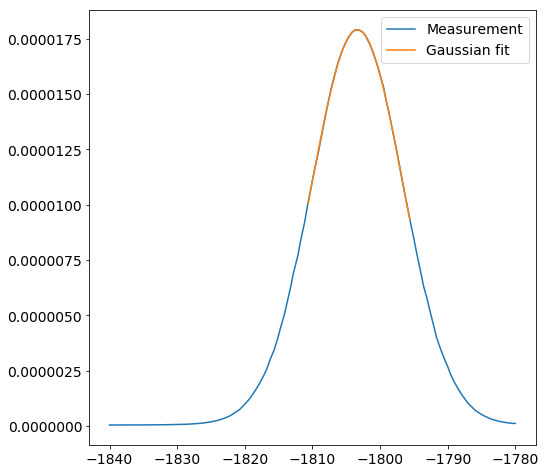

In [6]:
first_order_optimal_m1_pitch=fitGaussToSet(dataFolder/"19.02.04.rollfix_test.h5",165,180,showPlots=True)

In [7]:
zero_order_optimal_m1_pitch=fitGaussToSet(dataFolder/"19.02.04.rollfix_test.h5",151,163,showPlots=False)

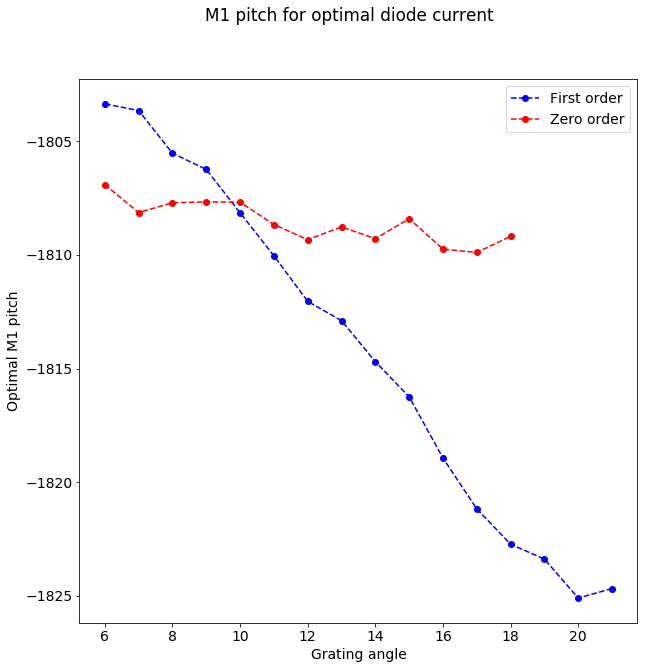

In [8]:
fig=plt.figure(figsize=(10,10))
plt.suptitle('M1 pitch for optimal diode current')
plt.xlabel("Grating angle")
plt.ylabel("Optimal M1 pitch")
plt.plot(range(21,5,-1),first_order_optimal_m1_pitch,'--bo',label="First order")
plt.plot(range(6,19,1),zero_order_optimal_m1_pitch,'--ro',label="Zero order")
plt.legend()
plt.show()

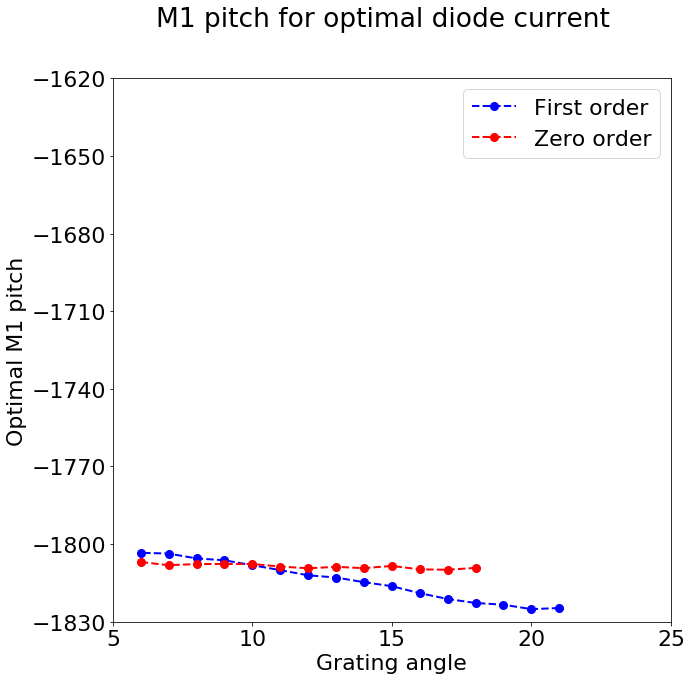

In [35]:
initial_first_order_optimal_m1_pitch = [
    -1694.51,
    -1708.64,
    -1715.99,
    -1722.91,
    -1723.12,
    -1724.03,
    -1728.06,
    -1733,
    -1734.05,
    -1740.07,
    -1742.97,
    -1745,
    -1748.04,
    -1749.06,
    -1755.05,
    -1759.08,
    -1757.99,
    -1760.08,
    -1760.97
]

initial_first_order_gratingAngle = [
    23.32,
    20.19,
    18.04,
    16.47,
    15.24,
    14.26,
    13.44,
    12.75,
    11.64,
    10.77,
    10.08,
    9.5,
    9.01,
    8.22,
    7.61,
    7.12,
    6.72,
    6.37,
    6.07
]
initial_zero_order_optimal_m1_pitch = [
    -1757,
    -1750,
    -1742,
    -1736,
    -1729,
    -1721,
    -1713,
    -1706,
    -1698,
    -1691,
    -1683,
    -1676,
    -1668,
    -1660    
]
initial_zero_order_gratingAngle = [
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19  
]
font = {'size'   : 22}
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(10,10))
plt.suptitle('M1 pitch for optimal diode current')
plt.xlabel("Grating angle")
plt.ylabel("Optimal M1 pitch")
plt.plot(range(21,5,-1),first_order_optimal_m1_pitch,'--bo',lw=2,markersize=8,label="First order")
plt.plot(range(6,19,1),zero_order_optimal_m1_pitch,'--ro',lw=2,markersize=8,label="Zero order")
plt.plot(initial_first_order_gratingAngle,initial_first_order_optimal_m1_pitch,'--bo',lw=2,markersize=8,label="First order")
plt.plot(initial_zero_order_gratingAngle,initial_zero_order_optimal_m1_pitch,'--ro',lw=2,markersize=8,label="Zero order")
plt.ylim([-1830,-1650])
ax=plt.gca()
ax.xaxis.set_ticks(np.arange(5, 30, 5))
ax.yaxis.set_ticks(np.arange(-1830, -1600, 30))
plt.legend()
plt.show()

In [2]:
def getGratingAngle(hv,lineDensity,cff):
    
    h = 6.62607e-34
    c = 2.99792e8
    joules_per_eV = 1.60218e-19
    
    wavelength = h*c/(hv*joules_per_eV)
    
    alpha = math.acos(wavelength*lineDensity/(cff**2 -1) * (math.sqrt(cff**2 + (cff**2-1)**2/(wavelength**2*lineDensity**2))-1 ))
    # in radians!
    
    beta = np.rad2deg(math.asin(cff*math.sin(alpha)))
    return beta

In [4]:
getGratingAngle(10.3,800000,2.25)

28.185978050946023

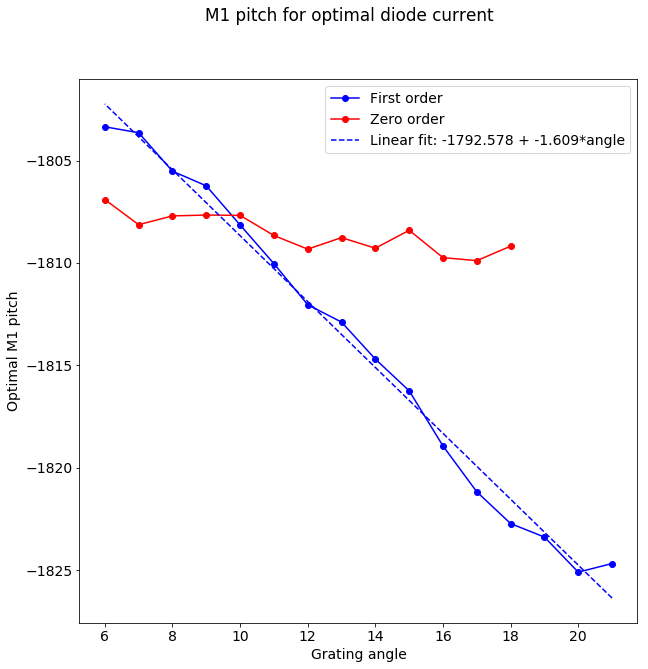

In [110]:
###########################
def residual(params, x, y):
###########################
    return (y-line(params,x))

########################
def line(params,x):
########################    
    slope = params['slope'].value
    offset = params['offset'].value

    model = offset + slope*x

    return model

fig=plt.figure(figsize=(10,10))
plt.suptitle('M1 pitch for optimal diode current')
plt.xlabel("Grating angle")
plt.ylabel("Optimal M1 pitch")
plt.plot(range(21,5,-1),first_order_optimal_m1_pitch,'-bo',label="First order")
plt.plot(range(6,19,1),zero_order_optimal_m1_pitch,'-ro',label="Zero order")

params = Parameters()

params.add('offset', 	value=-1805, vary=True)
params.add('slope', 	value=-1.5,vary=True)

out = minimize(residual, params,args=(range(21,5,-1), first_order_optimal_m1_pitch),method='leastsq')
fittedCurve=line(out.params,range(21,5,-1))
plt.plot(range(21,5,-1),fittedCurve,'--b',label="Linear fit: {0:.3f} + {1:.3f}*angle".format(out.params['offset'].value,out.params['slope'].value))

print

plt.legend()
plt.show()

In [5]:
-1792.6 - 1.609*28

-1837.6519999999998